In [66]:
import numpy, torch, math, random
import matplotlib.pyplot as plt

# FREQUENCY based model

In [67]:
def think(decision: int):
    prob = likeyly_hood[decision]
    return torch.multinomial(prob, num_samples=1)


def update(result, bot_dec, hum_dec):
    if result == 0:
        likeyly_hood[bot_dec, hum_dec] += likeyly_hood[bot_dec, hum_dec] * 1
        likeyly_hood[hum_dec, bot_dec] -= likeyly_hood[hum_dec, bot_dec] * 0.1
    elif result == 1:
        likeyly_hood[bot_dec, hum_dec] -= likeyly_hood[bot_dec, hum_dec] * 1
        likeyly_hood[hum_dec, bot_dec] += likeyly_hood[hum_dec, hum_dec] * 0.1
    elif result == -1:
        likeyly_hood[bot_dec] += 0.1
        likeyly_hood[hum_dec] += 0.2
    return likeyly_hood / likeyly_hood.sum(dim=1, keepdim=True)


likeyly_hood = torch.Tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
category_to_data = {"rock": 0, "paper": 1, "scissor": 2}
category_to_player = {"bot": 0, "human": 1}
who_win = [
    [-1, 1, 0],
    [0, -1, 1],
    [1, 0, -1],
]

In [ ]:
games = 0
human = 0
computer = 0
likeyly_hood = torch.Tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
category_to_data = {"rock": 0, "paper": 1, "scissor": 2}
category_to_player = {"bot": 0, "human": 1}


def update(result, bot_dec, hum_dec):
    if result == 0:
        likeyly_hood[bot_dec, hum_dec] += likeyly_hood[bot_dec, hum_dec] * 1
        likeyly_hood[hum_dec, bot_dec] -= likeyly_hood[hum_dec, bot_dec] * 0.1
    elif result == 1:
        likeyly_hood[bot_dec, hum_dec] -= likeyly_hood[bot_dec, hum_dec] * 1
        likeyly_hood[hum_dec, bot_dec] += likeyly_hood[hum_dec, hum_dec] * 0.1
    elif result == -1:
        likeyly_hood[bot_dec] += 0.1
        likeyly_hood[hum_dec] += 0.2
    return likeyly_hood / likeyly_hood.sum(dim=1, keepdim=True)

who_win = [
    [-1, 1, 0],
    [0, -1, 1],
    [1, 0, -1],
]
print(category_to_data)
while False:
    try:
        hum = int(input())
        bot = think(hum)
        result = who_win[bot][hum]
        if result == 0:
            print("you loose")
            computer += 1
        elif result == 1:
            print("you win")
            human += 1
        else:
            print("tie")
        likeyly_hood = update(result, bot, hum)
        games += 1
    except Exception:
        break
print(f"total{games=}")
print(f"scored, {human=}")
print(f"scored, bot{computer=}")

In [ ]:
print(likeyly_hood)

In [111]:
# memory
games = 0
human = 0
computer = 0

# Initialize likelihood with equal probability for each move
likelihood = torch.Tensor([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

In [ ]:
category_to_data = {"rock": 0, "paper": 1, "scissor": 2}
category_to_player = {"bot": 0, "human": 1}


@torch.no_grad()
def update(result, bot_dec, hum_dec):
    """
    Updates the likelihood matrix based on the result of the game.
    result: 0 (loss), 1 (win), -1 (tie)
    bot_dec: bot's move (0 = rock, 1 = paper, 2 = scissors)
    hum_dec: human's move (0 = rock, 1 = paper, 2 = scissors)
    """
    if result == 0:  # Bot wins
        likelihood[bot_dec, hum_dec] += likelihood[bot_dec, hum_dec] * 0.1
        likelihood[hum_dec, bot_dec] -= likelihood[hum_dec, bot_dec] * 0.1
    elif result == 1:  # Human wins
        likelihood[bot_dec, hum_dec] -= likelihood[bot_dec, hum_dec] * 0.1
        likelihood[hum_dec, bot_dec] += likelihood[hum_dec, bot_dec] * 0.1
    elif result == -1:  # Tie
        likelihood[bot_dec] += 0.1
        likelihood[hum_dec] += 0.1

    # Normalize the likelihood to maintain probabilities
    ll = likelihood / likelihood.sum(dim=1, keepdim=True)
    return ll


@torch.no_grad()
def think(dec):
    """
    Bot makes a decision based on the likelihood matrix.
    hum_dec: The human's last move (0 = rock, 1 = paper, 2 = scissors)
    """
    # Use the likelihood matrix to predict the player's next move
    next_move_probs = likelihood[dec]
    next_move = torch.multinomial(next_move_probs, 1).item()
    return next_move


who_win = [
    [-1, 1, 0],  # Rock vs (Rock, Paper, Scissors) -> (tie, loss, win)
    [0, -1, 1],  # Paper vs (Rock, Paper, Scissors) -> (win, tie, loss)
    [1, 0, -1],  # Scissors vs (Rock, Paper, Scissors) -> (loss, win, tie)
]

print("Enter 0 for Rock, 1 for Paper, 2 for Scissors")
ix = 0
while True:
    try:
        bot = think(ix)
        hum = int(input("Your move (0 = Rock, 1 = Paper, 2 = Scissors): "))
        if hum not in [0, 1, 2]:
            print("Invalid input. Please enter 0, 1, or 2.")
            continue
        result = who_win[bot][hum]
        if result == 0:
            print("You lose! Bot chose", list(category_to_data.keys())[bot])
            computer += 1
        elif result == 1:
            print("You win! Bot chose", list(category_to_data.keys())[bot])
            human += 1
        else:
            print("It's a tie! Bot chose", list(category_to_data.keys())[bot])

        likelihood = update(result, bot, hum)
        ix = hum
        games += 1
    except Exception as e:
        print("Error occurred. Exiting game.", e)
        break

print(f"Total games played: {games}")
print(f"Human score: {human}")
print(f"Bot score: {computer}")

In [ ]:
likelihood

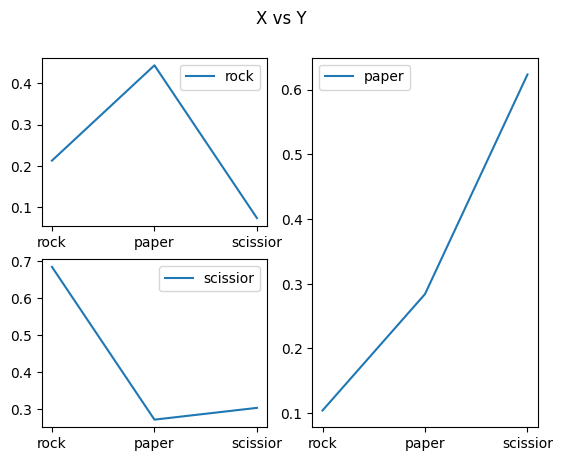

In [221]:

x = likelihood
label = ["rock", "paper", "scissior"]
fig, axs = plt.subplot_mosaic([["rock", "paper"],["scissor", "paper"]])
fig.suptitle("X vs Y")
for index, ax in enumerate(axs.values()):
  ax.plot(label, x[:, index], label=label[index])
  ax.legend()


# MLP approach

Will use:

- 3, 30 input neurons,
- 30, 20
- 20, 3
- cross_entropy

In [73]:
model = torch.nn.Sequential(
torch.nn.Embedding(3, 2),
torch.nn.Flatten(),
torch.nn.Linear(in_features=2, out_features=30, bias=True),
torch.nn.Tanh(),
torch.nn.Linear(in_features=30, out_features=3, bias=False),
)

In [ ]:
model(torch.tensor([1,2]))

### Experiment

In [75]:
magic = torch.tensor([[0, 1, 2], [1, 2, 0], [2, 0, 1]])
out = torch.tensor(who_win)
C = torch.rand(3, 2)
Xb = C[[0]]
W1 = torch.randn(2, 30) / (math.sqrt(3))
bais = torch.randn(1, 30)
W2 = torch.randn(30, 3)

In [76]:
l1 = (Xb@W1 + bais).tanh()
l2 = l1 @ W2

In [ ]:
c = l2.exp()
prob = c/c.sum(1, keepdim=True)
prob

In [78]:
def predict(ix:torch.Tensor)->torch.Tensor:
  Xb = C[[ix]]
  l1 = (Xb@W1) + bais
  logits = l1 @ W2
  return torch.nn.functional.softmax(l2, 1)

# def backward_pass(guessed:int, probabilities:torch.Tensor):
  # loss = -torch.log(probabilities[0, guessed]).mean()
  # loss.backward()

In [ ]:
plt.plot(sorted(l1.view(-1).tolist()))

In [80]:
# Respectable!

### Version1 Simple!

In [164]:
# initialization of weights
# -_________A.I memory_______-#
n_embed = 2
move_to_guess = 1
initial_guess = 0
total_moves = 3
n_hidden = 30

# -_________Game-analysis-memory_________-#
W1 = torch.nn.init.kaiming_normal_(
    torch.randn(total_moves, n_hidden), nonlinearity="tanh"
)
bais1 = torch.randn(1, n_hidden) * 0.01  # magical number
W2 = torch.randn(n_hidden, total_moves)/math.sqrt(n_hidden) # apply the kaiming fan_in only not the gain!
paramters = [W1, bais1, W2]
for p in paramters:
  p.requires_grad = True

In [ ]:
# Game!
lossi = []
ix = initial_guess
while True:
  # forward pass
  # embed = C[[ix]]
  hpreact = W1[ix] + bais1
  h = hpreact.tanh()
  logits = h@W2
  loss = torch.nn.functional.cross_entropy(logits, torch.tensor([ix]))
  probs = torch.nn.functional.softmax(logits, 1)
  # Now main work!
  bot_guess = torch.multinomial(probs, num_samples=move_to_guess)
  human_showed = None

  while True:
    try:
      human_showed = int(input("Enter(0.rock), (1.paper), (2.scissor): "))
      if human_showed > 3 and human_showed < 0:
        print("Ivalid!")
      else:
        break
    except Exception:
      exit(-1)
  
  # rewarding_time (backward_pass)
  for p in paramters:
    p.grad = None
  loss.backward()

  ix = human_showed

  # if the guess is correct improve the probability!
  lr = 0.1 if human_showed == bot_guess[0,0] else -0.05

  # gradient clipping
  torch.nn.utils.clip_grad_norm_(parameters=paramters, max_norm=1.0)

  # update
  for p in paramters:
    p.data += -lr * p.grad

  lossi.append(loss.log10())
  print(f"bot_guess={bot_guess[0,0]}, {human_showed=}")
  # break

In [ ]:
a = W1
# plt.plot(torch.tensor(lossi).detach())
# plt.plot(W1.detach());

### Version2 with little bit of context

In [217]:
context_size = 10  # remember 10 move to accuire pattern
context = [0] * context_size
n_embed = 3
initial_guess = 0
move_to_guess = 1
total_moves = 3
n_hidden = 30

# -_________Game-analysis-memory_________-#
C = torch.randn(3, 3)
W1 = torch.nn.init.kaiming_normal_(
    torch.randn(context_size*n_embed, n_hidden), nonlinearity="tanh"
)
bais1 = torch.randn(1, n_hidden) * 0.01  # magical number
W2 = torch.randn(n_hidden, total_moves) / math.sqrt(
    n_hidden
)  # apply the kaiming fan_in only not the gain!
paramters = [C, W1, bais1, W2]
for p in paramters:
    p.requires_grad = True

In [219]:
# Game!
lossi = []
last_context = context[-1]
while True:
    # forward pass
    Xb = torch.tensor(context)
    hpreact = C[Xb].view(1, -1) @ W1 + bais1
    h = hpreact.tanh()
    logits = h @ W2
    loss = torch.nn.functional.cross_entropy(logits, torch.tensor([last_context]))
    probs = torch.nn.functional.softmax(logits, 1)
    # Now main work!
    bot_guess = torch.multinomial(probs, num_samples=move_to_guess)
    human_showed = None

    signal_exit = False
    while True:
        try:
            human_showed = int(input("Enter(0.rock), (1.paper), (2.scissor): "))
            if human_showed not in [0, 1, 2]:
                print("Ivalid!")
            else:
                break
        except Exception:
            print("Exiting...")
            signal_exit = True
            break
    if signal_exit:
        break

    # rewarding_time (backward_pass)
    for p in paramters:
        p.grad = None
    loss.backward()
    last_context = human_showed
    context = context[1:] + [last_context]

    print(context)

    # if the guess is correct improve the probability!
    lr = 0.1 if human_showed == bot_guess[0, 0] else -0.05

    # gradient clipping
    torch.nn.utils.clip_grad_norm_(parameters=paramters, max_norm=1.0)

    # update
    for p in paramters:
        p.data += -lr * p.grad

    lossi.append(loss.log10())
    print(f"bot_guess={bot_guess[0,0]}, {human_showed=}")
print("Thanku for playing this game.")

[0, 0, 0, 1, 1, 1, 0, 2, 1, 1]
bot_guess=0, human_showed=1
[0, 0, 1, 1, 1, 0, 2, 1, 1, 2]
bot_guess=2, human_showed=2
[0, 1, 1, 1, 0, 2, 1, 1, 2, 2]
bot_guess=0, human_showed=2
[1, 1, 1, 0, 2, 1, 1, 2, 2, 1]
bot_guess=1, human_showed=1
[1, 1, 0, 2, 1, 1, 2, 2, 1, 1]
bot_guess=2, human_showed=1
[1, 0, 2, 1, 1, 2, 2, 1, 1, 2]
bot_guess=1, human_showed=2
[0, 2, 1, 1, 2, 2, 1, 1, 2, 0]
bot_guess=1, human_showed=0
Exiting...
Thanku for playing this game.


# Experiments With Weight

In [47]:
a = torch.rand(30, 3)
b = torch.nn.init.kaiming_normal_(a.clone(), nonlinearity="tanh")

In [ ]:
plt.plot(sorted(a.view(-1).tolist()), label="randn")
plt.plot(sorted(b.view(-1).tolist()), label="kaiming_normal")
plt.legend()
print(a.std(), b.std())